<a href="https://colab.research.google.com/github/Raihan4520/Neural-Network/blob/main/NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network From Scratch**

In [ ]:
# Package imports
import time
import random
import numpy as np
import matplotlib.pyplot as plt


Shape of matrix X: (200, 2)
Shape of matrix Y: (200, 1)



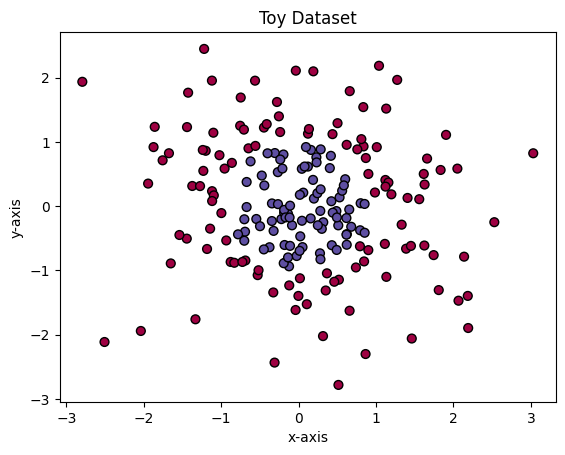

In [ ]:
# Create toy dataset
np.random.seed(1)
X = np.random.randn(200, 2)
Y = (np.linalg.norm(X, axis=1) < 1).astype(int).reshape(-1, 1)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Toy Dataset')
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral, edgecolors='k')

print("Shape of matrix X:", X.shape)
print("Shape of matrix Y:", Y.shape)
print()


In [ ]:
# Create neural network class
class NeuralNetwork(object):
  def __init__(self): # Build the model
    # Initialize number of neurons for layers
    n1 = 2   # Number of neurons in input layer
    n2 = 20  # Number of neurons in hidden layer 1
    n3 = 10  # Number of neurons in hidden layer 2
    n4 = 1   # Number of neurons in output layer

    self.alpha = 0.1 # Learning rate

    # Initialize random weights for layers
    self.W1 = np.random.randn(n1, n2)  # Weights for hidden layer 1
    self.W2 = np.random.randn(n2, n3)  # Weights for hidden layer 2
    self.W3 = np.random.randn(n3, n4)  # Weights for output layer

    # Initialize random biases for layers
    self.B1 = np.random.randn(1, n2)  # Bias for hidden layer 1
    self.B2 = np.random.randn(1, n3)  # Bias for hidden layer 2
    self.B3 = np.random.randn(1, n4)  # Bias for output layer

  def sigmoid(self, X, derivative=False): # Activation function
    return X * (1 - X) if derivative else 1 / (1 + np.exp(-X))

  def ReLU(self, X, derivative=False): # Activation function
    return 1.0 * (X > 0) if derivative else X * (X > 0)

  def feedForward(self, X): # Forward propagation
    # Forward pass for hidden layer 1
    Z1 = np.dot(X, self.W1) + self.B1
    self.A1 = self.ReLU(Z1)

    # Forward pass for hidden layer 2
    Z2 = np.dot(self.A1, self.W2) + self.B2
    self.A2 = self.ReLU(Z2)

    # Forward pass for output layer
    Z3 = np.dot(self.A2, self.W3) + self.B3
    A3 = self.sigmoid(Z3)
    return A3

  def backPropagation(self, X, Y, A3): # Backward propagation
    m = X.shape[0]  # Number of training examples

    # Compute error for output layer
    dZ3 = A3 - Y
    dW3 = np.dot(self.A2.T, dZ3) / m
    dB3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Compute error for hidden layer 2
    dA2 = np.dot(dZ3, self.W3.T)
    dZ2 = dA2 * self.ReLU(self.A2, derivative=True)
    dW2 = np.dot(self.A1.T, dZ2) / m
    dB2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Compute error for hidden layer 1
    dA1 = np.dot(dZ2, self.W2.T)
    dZ1 = dA1 * self.ReLU(self.A1, derivative=True)
    dW1 = np.dot(X.T, dZ1) / m
    dB1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases using gradient descent
    self.W3 -= self.alpha * dW3
    self.B3 -= self.alpha * dB3
    self.W2 -= self.alpha * dW2
    self.B2 -= self.alpha * dB2
    self.W1 -= self.alpha * dW1
    self.B1 -= self.alpha * dB1

  def train(self, X, Y): # Train the model
    output = self.feedForward(X)
    self.backPropagation(X, Y, output)

  def predict(self, X): # Predict the output
    return self.feedForward(X)

  def binary_cross_entropy(self, Y, Y_hat):
    epsilon = 1e-12  # Small constant to avoid log(0)
    Y_hat = np.clip(Y_hat, epsilon, 1 - epsilon)  # Ensure Y_hat is between epsilon and 1-epsilon
    N = Y.shape[0]
    return -np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)) / N


In [ ]:
# Initialize the model
model = NeuralNetwork()


In [ ]:
# Train the model
# mse = [] # Mean squared error
bce = [] # Binary cross-entropy
epochs = 1000

# Record start time
start_time = time.time()

for epoch in range(epochs):
  model.train(X,Y)
  # mse.append(np.mean((Y - model.predict(X))**2))
  loss = model.binary_cross_entropy(Y, model.predict(X))
  bce.append(loss)

  if epoch == 0 or (epoch + 1) % 100 == 0:  # Print loss every 100 epochs
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Record end time
end_time = time.time()

# Calculate and print training time
training_time = end_time - start_time
print("---------------------------------")
print(f"Total training time: {training_time:.2f} seconds")
print("---------------------------------")


Epoch [1/1000], Loss: 1.4650
Epoch [100/1000], Loss: 0.0999
Epoch [200/1000], Loss: 0.0614
Epoch [300/1000], Loss: 0.0448
Epoch [400/1000], Loss: 0.0350
Epoch [500/1000], Loss: 0.0287
Epoch [600/1000], Loss: 0.0242
Epoch [700/1000], Loss: 0.0210
Epoch [800/1000], Loss: 0.0185
Epoch [900/1000], Loss: 0.0164
Epoch [1000/1000], Loss: 0.0148
---------------------------------
Total training time: 0.50 seconds
---------------------------------


Text(0.5, 1.0, 'Binary Cross-Entropy')

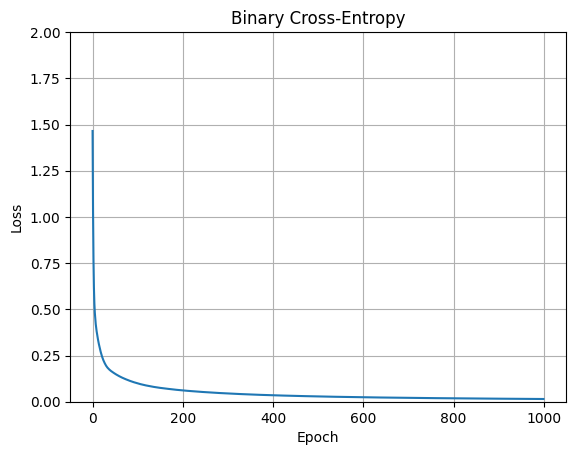

In [ ]:
# Plot binary cross-entropy
plt.plot(bce)
plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Binary Cross-Entropy")


In [ ]:
# Helper function to plot a decision boundary
def plot_decision_boundary(pred_func):
  # Create a meshgrid for plotting decision boundaries
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Predict the entire grid of points
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='k')


Text(0.5, 1.0, 'Decision Boundary')

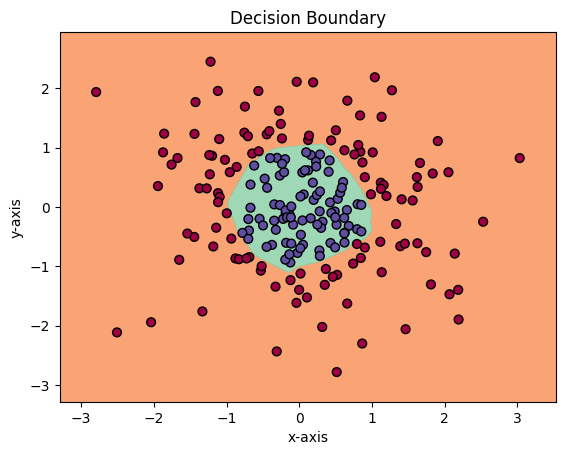

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Decision Boundary")
